#  **Mathematical Morphology Image Processing **
prepared by: EL-ALAOUI Ali & HAKEM Adnane




### Goals
* We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.


* We will see different functions like : cv.erode(), cv.dilate(), cv.morphologyEx() etc. 

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image

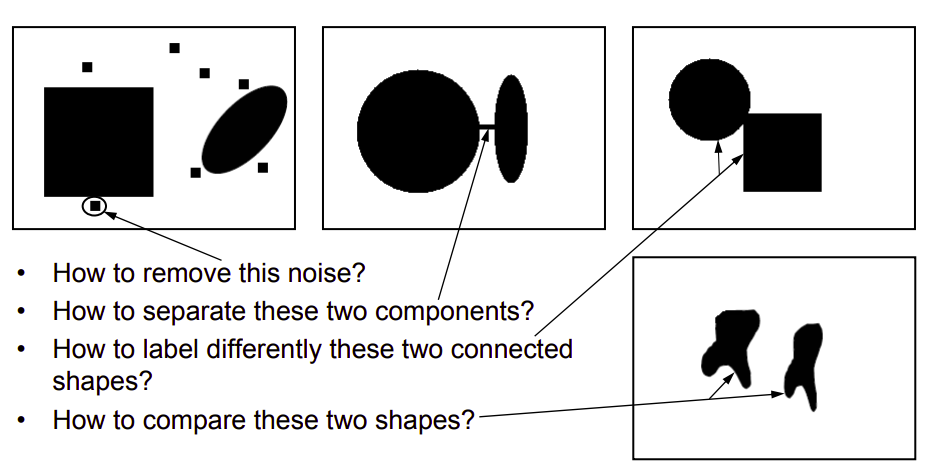

## Structuring Element or kernel
 * A small set used to analyse locally the image
 * Shape and size of SE <----- a priori knowledge about the geometry of relevant/irrelevant image structures
 *Usually symmetrical, connected, and convex

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

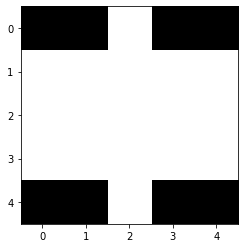

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
# Elliptical Kernel
es2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
plt.imshow(es2,cmap='gray')
plt.show()
es2

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


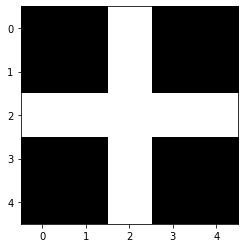

In [ ]:
# Cross-shaped Kernel
es3=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
plt.imshow(es3,cmap='gray')
print(es3)
plt.show()

### Generate 2D and 3D structuring elements

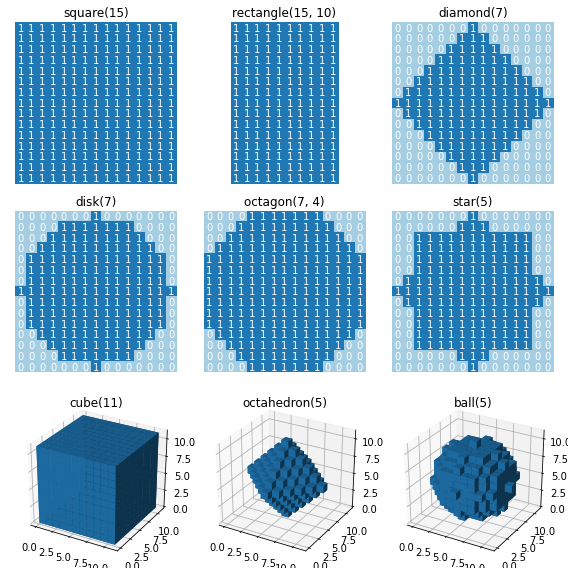

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

# Generate 2D and 3D structuring elements.
struc_2d = {
    "square(15)": square(15),
    "rectangle(15, 10)": rectangle(15, 10),
    "diamond(7)": diamond(7),
    "disk(7)": disk(7),
    "octagon(7, 4)": octagon(7, 4),
    "star(5)": star(5)
}

struc_3d = {
    "cube(11)": cube(11),
    "octahedron(5)": octahedron(5),
    "ball(5)": ball(5)
}

# Visualize the elements.
fig = plt.figure(figsize=(8, 8))

idx = 1
for title, struc in struc_2d.items():
    ax = fig.add_subplot(3, 3, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax.text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax.set_axis_off()
    ax.set_title(title)
    idx += 1

for title, struc in struc_3d.items():
    ax = fig.add_subplot(3, 3, idx, projection=Axes3D.name)
    ax.voxels(struc)
    ax.set_title(title)
    idx += 1

fig.tight_layout()
plt.show()

# Dilation and erosion
* Fundamental morphological operators
* All other operators are expressed in terms of
dilations and erosions
  
* **Dilation**  
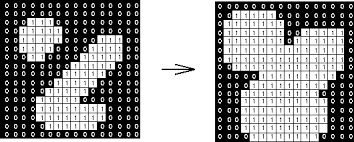





* **Erosion:**
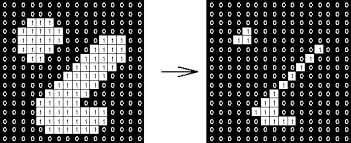

# Dilation
### $δ_{B}x=max_{(β∈B)} f(x+β)$
* The dilation of an image f by a structuring element B is the **assignment** to each pixel of the **output image** with the **maximum value** found over the **neighborhood** of the pixels where **the neighborhood is defined by the structuring element B**:

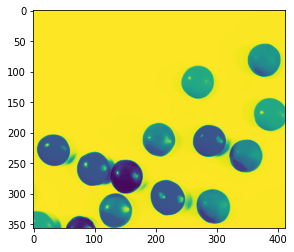

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/smarties.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

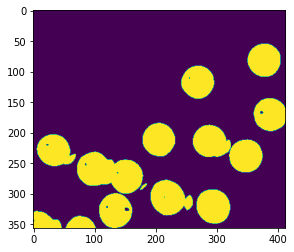

In [ ]:
# creating mask of the input image
_,mask = cv2.threshold(img,220, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask)
plt.show()

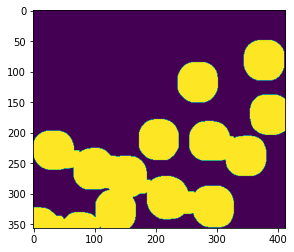

In [ ]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(mask, kernel, iterations=3)
plt.imshow(dilation)
plt.show()

# Erosion
### $ ε_{B}x=min_{(β∈B)} f(x+β)$
* The erosion of an image f by a structuring element B is the **assignment** to each pixel of the **output image** with the **minimum** value found over the neighborhood of the pixel where **the neighborhood is defined by the structuring element B**

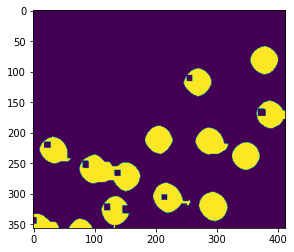

In [ ]:
erosion = cv2.erode(mask, kernel, iterations=2)
plt.imshow(erosion)
plt.show()

# Opening
### opening(f(x,y)) = dilation(erosion(f(x,y))))<br>
* An opening is an erosion followed by a dilation. Erosion **opens dark holes** and dilation **recovers the shape**.<br>
* dilation---+-->erosion:<br>
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, 
cv.morphologyEx()

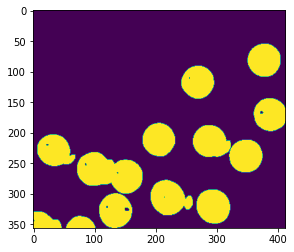

In [ ]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN,kernel)
plt.imshow(opening)
plt.show()

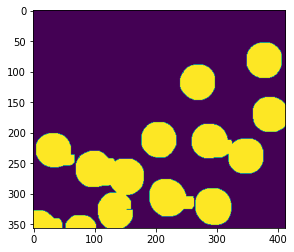

In [ ]:
erosion_dilation= cv2.dilate(erosion, kernel, iterations=3)
plt.imshow(erosion_dilation)
plt.show()

# Closing
### closing(f) = erosion(dilation(f)) <br>
* dilation ----+---->Erosion:<br>Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

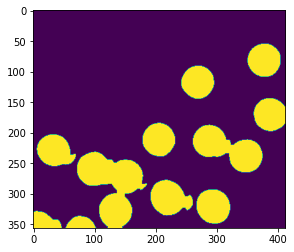

In [ ]:
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE,kernel)
plt.imshow(closing)
plt.show()

# Morphological Gradient
* The gradient is used in image processing to detect edges. A common assumption is that object edges are located where there are high grayscale variation. The gradient returns the maximum variation of the grayscale intensities within the neighborhood defined by the structuring element.
* It is the difference between dilation and erosion of an image.The result will look like the outline of the object.

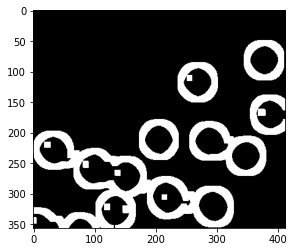

In [ ]:
gradient_mor=dilation-erosion
plt.imshow(gradient_mor,cmap='gray')
plt.show()

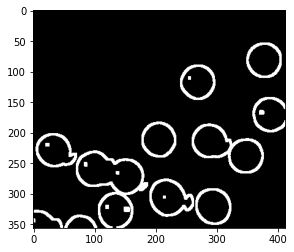

In [ ]:
mor_gradient = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernel)
plt.imshow(mor_gradient,cmap='gray')
plt.show()

# External gradient
## $ρ+_{B(f)}=δ_{B(f)}-f $ <br>
 The external gradient **enhances** the internal boundaries of objects darker than their background and external boundaries of objects brighter than their background.


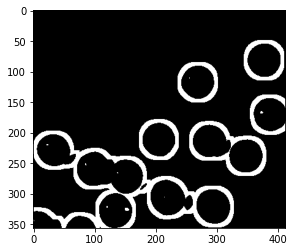

In [ ]:
ex_grad=dilation-mask
plt.imshow(ex_grad,cmap='gray')
plt.show()

# internal gradient 
$ρ-_{B}(f)=f-ε_{B}(f)$
* The internal **gradient enhances the internal boundaries** of objects brighter than their background and external boundaries of objects darker than their background.

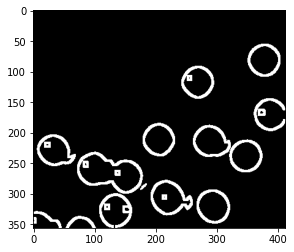

In [ ]:
in_grad=mask-erosion
plt.imshow(in_grad,cmap='gray')
plt.show()

# Top Hat :
* These operations are used to detect in a binary or grayscale image peaks or troughs of a certain size independently from their hight


# White Top-Hat (WTH(f))
* It is the **difference between input image and Opening of the image**. Below example is done for a 5x5 kernel
* Effects:
*Extracts light features (peaks).
*Extracts all light structures that are not contained in the structuring element.

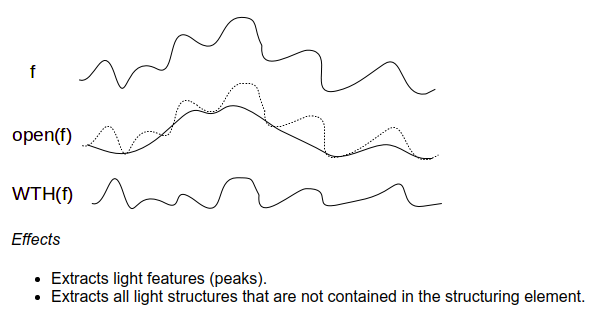

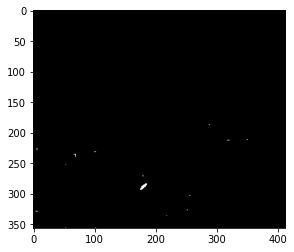

In [ ]:
tophate=mask-opening
plt.imshow(tophate,cmap='gray')

plt.show()


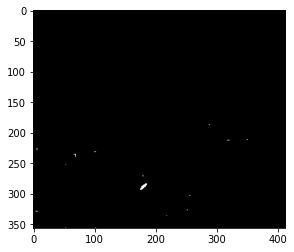

In [ ]:
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophate,cmap='gray')
plt.show()

#  Black Hat
* It is the difference between the closing of the input image and input image.
*--->Effects:<br>
*Extracts dark features (troughs).
*Extracts all dark structures that are not contain in the the structuring element.

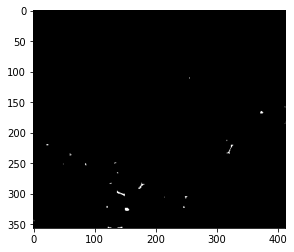

In [ ]:
bh=closing-mask
plt.imshow(bh,cmap='gray')
plt.show()

# Morphological Laplacian
## $ \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} $

$kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0  \end{bmatrix}$
* The morphological Laplacian is defined as the arithmetic difference between the internal and the external gradient. The object boundaries are located at the zero-crossing of the Laplacian image.

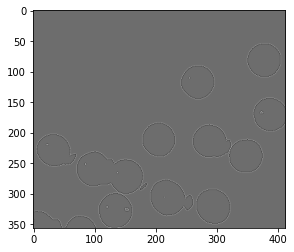

In [ ]:
laplacian = cv2.Laplacian(mask,cv2.CV_64F)
plt.imshow(laplacian,cmap = 'gray')
plt.show()

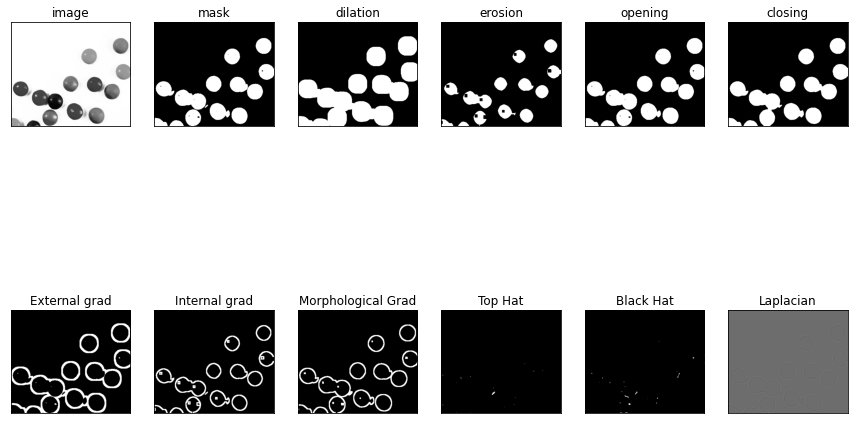

In [ ]:
titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing','External grad','Internal grad', 'Morphological Grad', 'Top Hat','Black Hat','Laplacian']
images = [img, mask, dilation, erosion, opening, closing,ex_grad,in_grad,mor_gradient,tophate,bh,laplacian]

plt.figure(figsize=(15,15))

for i in range(12):
    plt.subplot(3, 6, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

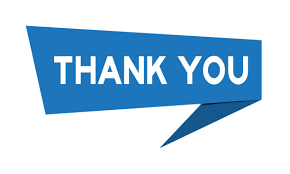